# Applied Probability and Statistics - Zeljko Stojkovic 2021230319

## Dataset:
The project is centered around the "Video Game Sales" dataset, this dataset contains a list of video games with sales greater than 100,000 copies.

## Project Objective:
The primary goal of this project is to conduct a statistical analysis of the "Video Game Sales" dataset. The analysis will employ a variety of statistical methods learned during the course to extract meaningful insights.


## Dataset Contents:
- Name - The games name
- Platform - Platform of the games release (i.e. PC,PS4, etc.)
- Year - Year of the game's release
- Genre - Genre of the game
- Publisher - Publisher of the game
- NA_Sales - Sales in North America (in millions)
- EU_Sales - Sales in Europe (in millions)
- JP_Sales - Sales in Japan (in millions)
- Other_Sales - Sales in the rest of the world (in millions)
- Global_Sales - Total worldwide sales.
- Popularity_Scale - Popularity scale of game (1 - 5)
- Rating - Rating of game (1 - 10)

## Exploratory Data Analysis (EDA):
### Loading the dataset:
Before we can start, we must first import the required libraries and modules which will be used for this EDA, as well as import the dataset.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from IPython.display import display
from scipy import stats
import statsmodels.formula.api as sm

In [ ]:
#Read data
df = pd.read_csv('vgsales.csv')

## 1. Analyzing the dataset:
The next step will be general analysis of the dataset.

In [ ]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [ ]:
# Numbers of rows and columns in the dataset
df.shape

(16598, 11)

In [ ]:
# Name of columns
df.columns

Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')

In [ ]:
# Detailed information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [ ]:
# Check if there are any null values
df.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [ ]:
# Print out the number of unique values in each column
df.nunique()

Rank            16598
Name            11493
Platform           31
Year               39
Genre              12
Publisher         578
NA_Sales          409
EU_Sales          305
JP_Sales          244
Other_Sales       157
Global_Sales      623
dtype: int64

### 1.1. Data Cleaning
In the data cleaning phase we've observed a few important issues that require to be fixed. Specifically, missing values were observed in the 'Year' and 'Publisher' columns. It was decided to fill in the missing values in the 'Year' column with the mean year value. As 'Publisher' is a text column, the dicision was made to drop it from the dataset.

In [ ]:
# Fill null values with year mean value
df['Year'] = df['Year'].fillna(df['Year'].mean())

In [ ]:
df.isnull().sum()

Rank             0
Name             0
Platform         0
Year             0
Genre            0
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
Global_Sales     0
dtype: int64

In [ ]:
df = df.dropna(axis=0)

In [ ]:
# Remove rows with remaining missing values
df.isnull().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

In [ ]:
thresholds = [0, 0.1, 0.2, 0.5, 1.0, float('inf')]

df['Popularity_Scale'] = pd.cut(df['Global_Sales'], bins=thresholds, labels=[1, 2, 3, 4, 5], include_lowest=True)

df[['Name', 'Global_Sales', 'Popularity_Scale']].head(14000)

,Name,Global_Sales,Popularity_Scale
0,Wii Sports,82.74,5
1,Super Mario Bros.,40.24,5
2,Mario Kart Wii,35.82,5
3,Wii Sports Resort,33.00,5
4,Pokemon Red/Pokemon Blue,31.37,5
...,...,...,...
14034,J-League Pro Striker 2,0.04,1
14035,Obscure,0.04,1
14036,Caesar III,0.04,1
14037,Super Robot Taisen: Scramble Commander the 2nd,0.04,1


In [ ]:
popularity_counts = df['Popularity_Scale'].value_counts()
print(popularity_counts)

Popularity_Scale
1    6154
3    3535
2    2911
5    2051
4    1889
Name: count, dtype: int64


In [ ]:
df['Rating'] = np.random.randint(1, 11, size=len(df))

print(df[['Name', 'Global_Sales', 'Popularity_Scale', 'Rating']].head())

                       Name  Global_Sales Popularity_Scale  Rating
0                Wii Sports         82.74                5       5
1         Super Mario Bros.         40.24                5       4
2            Mario Kart Wii         35.82                5       9
3         Wii Sports Resort         33.00                5       8
4  Pokemon Red/Pokemon Blue         31.37                5       6


## 2. Probability and Statistics

### 2.1. Estimation of the unconditional and conditional probabilities
#### Unconditional Probability
Unconditional probability is the probability of an event ocurring without any other events being taken into account it is calculated by dividing the number of times the event occurs by the total number of times the event can occur
$$
\mathbf{P(A) = \frac{N(A)}{N}}
$$


<Axes: title={'center': 'Video Genre'}, xlabel='Genre', ylabel='Probability'>

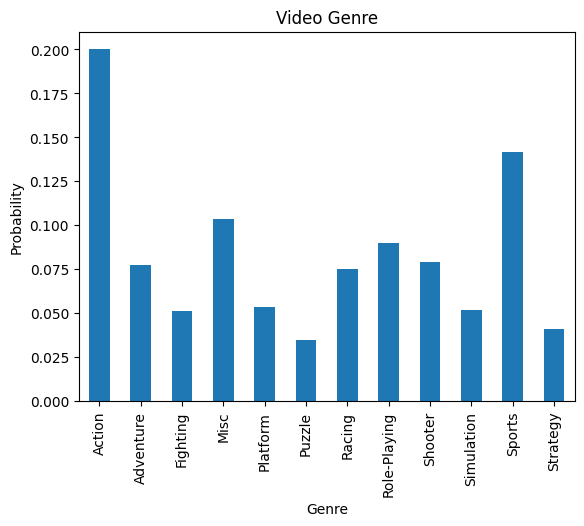

In [ ]:
# Calculate the probability of picking a random game from each genre
# by dividing the count of each genre by the total number of games in the dataset.
genre = df['Genre'].value_counts() / df['Genre'].count()

# Sort
genre.sort_index(inplace=True)

# Plot bar
genre.plot(kind='bar', title='Video Genre', xlabel='Genre', ylabel='Probability')

#### Conditional Probability
Conditional probability is the probability of an event occurring given that another event has already occurred. It is calculated by dividing the number of times both event occurs by the number of times the other event occurs.
$$
\mathbf{P(A|B) = \frac{P(A∩B)}{P(B)}}
$$

In [ ]:
# Calculate conditional probability that a game which have high popularity will have high rate

#Create a subset of data with games with high popularity grade (4,5)
#B
game_popularity = df[df['Popularity_Scale'] > 3]
#P(A|B)
game_popularity_rate = sum(game_popularity['Rating'] >= 5) / len(game_popularity)

print(f"The probability that a game from high popularity grade will have a high rate is {game_popularity_rate:.2f}.")

The probability that a game from high popularity grade will have a high rate is 0.62.


In [ ]:
# Check conditional probability that a game which have high rate will have high popularity
#B
game_rate = df[df['Rating'] > 5]
#P(A|B)
game_rate_popularity = sum(game_rate['Popularity_Scale'] >3) / len(game_rate)
print(f"The probability that a game which have high rate will be popular is {game_rate_popularity:.2f}.")

The probability that a game which have high rate will be popular is 0.24.


#### Note:
Among popular games, there's a tendency for them to have higher ratings compared to tendency for high-rated games to be popular.
In other words, within the subst of popular games, there is a higher likelihood of finding games with high ratings.

###  2.2. Estimation of the parameters of distributions of single variables (mathematical expectation, variance, standard deviation, median, quartiles, quantiles,...)

#### Mathematical Expectation
Mathematical expectation is the average value of a random variable. It is calculated by multiplying the value of the random variable by the probability of that value occurring and then summing all the values.

$$
\large\mathbf{E[X] = \sum_{i=1}^{n} x_i P(X = x_i)}
$$


In [ ]:
# Continuous values
columns = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']

In [ ]:
mean_values = df[columns].mean()
mean_table = pd.DataFrame({'Sales Region': mean_values.index, 'Mean Sales': mean_values.values})

display(mean_table)

,Sales Region,Mean Sales
0,NA_Sales,0.265079
1,EU_Sales,0.146883
2,JP_Sales,0.077998
3,Other_Sales,0.048191
4,Global_Sales,0.538426


#### Variance

Variance is the average of the squared differences from the mean. It is calculated by subtracting the mean from each value, squaring the result and then dividing the sum of the squared differences by the number of values.

$$
\large\mathbf{Var(X) = \sum_{i=1}^{n}(x_i - E(X))^2P(X = x_i)}
$$

In [ ]:
variance_values = df[columns].var()
variance_table = pd.DataFrame({'Sales Region': variance_values.index, 'Variance Sales': variance_values.values})

display(variance_table)

,Sales Region,Variance Sales
0,NA_Sales,0.669007
1,EU_Sales,0.256167
2,JP_Sales,0.095976
3,Other_Sales,0.035675
4,Global_Sales,2.425568


#### Standard Deviation
Standard deviation is a statistical measure that calculate square root of variance, providing a measure of how spread out the valeus are within the dataset. A smaller standard deviation indicates that the values tend to be close to the mean, while a high standard deviation indicates that the values are spread out over a wider range.

$$ \large\sigma = \sqrt{Var(X)}$$



In [ ]:
sdeviation_values = df[columns].std()
sdeviation_table = pd.DataFrame({'Sales Region': sdeviation_values.index, 'Standard Deviation Sales': sdeviation_values.values})

display(sdeviation_table)

,Sales Region,Standard Deviation Sales
0,NA_Sales,0.817929
1,EU_Sales,0.506129
2,JP_Sales,0.309800
3,Other_Sales,0.188879
4,Global_Sales,1.557424


#### Median
Median is the value that separates the major and minior half of a sample, population or probability distribution. In simpler terms, median can be the middle value of a dataset. In the dataset {1,3,3,6,7,8,9} median is 6.

$$ \large{md} = \begin{cases} x_{\frac{n-1}{2}}, & \text{for } n \text{ odd} \\[10pt] \frac{1}{2} \left( x_{\frac{n}{2}} + x_{\frac{n}{2}+1} \right), & \text{for } n \text{ even} \end{cases} $$



In [ ]:
median_values = df[columns].median()
median_table = pd.DataFrame({'Sales Region': median_values.index, 'Median Sales': median_values.values})
display(variance_table)

,Sales Region,Variance Sales
0,NA_Sales,0.669007
1,EU_Sales,0.256167
2,JP_Sales,0.095976
3,Other_Sales,0.035675
4,Global_Sales,2.425568


#### Quartiles
Quartiles are the values that divide the data into four equal parts. The first quartile is the median of the lower half of the data. The second quartile is the median of the data. The third quartile is the median of the upper half of the data.

In [ ]:
quant_values = df[columns].quantile([0.25, 0.5, 0.75]).transpose()
display(quant_values)

,0.25,0.50,0.75
NA_Sales,0.00,0.08,0.24
EU_Sales,0.00,0.02,0.11
JP_Sales,0.00,0.00,0.04
Other_Sales,0.00,0.01,0.04
Global_Sales,0.06,0.17,0.48


### 2.3. Estimation of the parameters of the joint distribution of two variables (covariance, correlation coefficient)

#### Covariance
Covariance provides insight into how two variables are related to one another. More precisely, covariance refers to the measure of how two random variables in a data set will change together. A positive covariance means that the two variables at hand are positively related, and they move in the same direciton. A negative covariance means that the variables are inversely related, or that they move in opposite directions.

$$ \large\mathbf{Cov(X,Y) = \sum_{i=1}^{n}(x_i - E(X))(y_i - E(Y))P(X = x_i, Y = y_i)}$$

In [ ]:
covariance = df[columns].cov()
display(covariance)

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
NA_Sales,0.669007,0.317799,0.113993,0.098047,1.198749
EU_Sales,0.317799,0.256167,0.068311,0.069435,0.711652
JP_Sales,0.113993,0.068311,0.095976,0.016978,0.295232
Other_Sales,0.098047,0.069435,0.016978,0.035675,0.220111
Global_Sales,1.198749,0.711652,0.295232,0.220111,2.425568


#### Correlation Coefficient

Correlation coefficient is a normalized version of covariance. Both covariance and correlation measure relationship and the dependency between two variables but correlation measures both the strength and direction of the linear realtionship between two variables. Correlation is a function of the covariance.

You can obtain the correlation coefficient of two variables by dividing the covariance of these variables by the product of the standard deviations of the same values.

$$ \large\mathbf{\rho(X,Y) = \frac{Cov(X,Y)}{\sigma_X\sigma_Y}}$$

In [ ]:
correlation = df[columns].corr()
display(correlation)

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
NA_Sales,1.000000,0.767672,0.449864,0.634651,0.941036
EU_Sales,0.767672,1.000000,0.435658,0.726326,0.902817
JP_Sales,0.449864,0.435658,1.000000,0.290150,0.611893
Other_Sales,0.634651,0.726326,0.290150,1.000000,0.748260
Global_Sales,0.941036,0.902817,0.611893,0.748260,1.000000


### 2.4. Parametric hypothesis testing
Parametric hypothesis testing is used to determine if two samples come from the same distribution. The test is based on the difference between the means of the two samples.

In [ ]:
test_data = df['Global_Sales']

# Number of samples
number_of_samples = 100

# Median and standard deviation
mean = test_data.mean()
std = test_data.std()

# Get random samples
sample = test_data.sample(number_of_samples)

# Find the average of the sample
avg = sample.mean()

# Confidence level
alpha = 0.05

# Generate confidence interval
CI = stats.t.interval(1 - alpha, df=number_of_samples - 1, loc=avg, scale=std/np.sqrt(number_of_samples))

print(f"Global Sales mean: {mean:.2f}")
print(f"Sample mean: {avg:.2f}")
print(f"Confidence interval: {CI}")

Global Sales mean: 0.54
Sample mean: 0.41
Confidence interval: (0.10547335924936013, 0.7235266407506398)


In [ ]:
# Margin of error
margin = np.abs(avg - mean)

# Quantile
quantile = margin * (np.sqrt(number_of_samples)) / std

p_val = 2 * (1 - stats.t.cdf(quantile, df=number_of_samples - 1))

print(f"p-value: {p_val:.2f}")

p-value: 0.43


## 3. Regression analysis

### 3.1 Data Processing
We will not use "Rank", "Name", "Year", "Publisher" variables in this data set. So we will delete these variables

In [ ]:
df.drop(["Rank","Name","Year","Publisher"],axis=1,inplace=True)
df.head()

,Platform,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Popularity_Scale,Rating
0,Wii,Sports,41.49,29.02,3.77,8.46,82.74,5,5
1,NES,Platform,29.08,3.58,6.81,0.77,40.24,5,4
2,Wii,Racing,15.85,12.88,3.79,3.31,35.82,5,9
3,Wii,Sports,15.75,11.01,3.28,2.96,33.00,5,8
4,GB,Role-Playing,11.27,8.89,10.22,1.00,31.37,5,6


### 3.2. Linear regression
is a statistical method used to find the relationship between two variables. The relationship is modeled using a linear function. The linear function is a straight line that passes through the origin. The linear function is represented by the equation:
$$\large\mathbf {y = mx + b}$$

In [ ]:
df_lr = df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']]

In [ ]:
M1 = sm.ols("Global_Sales ~ NA_Sales", df_lr).fit()
print(M1.summary())

                            OLS Regression Results                            
Dep. Variable:           Global_Sales   R-squared:                       0.886
Model:                            OLS   Adj. R-squared:                  0.886
Method:                 Least Squares   F-statistic:                 1.280e+05
Date:                Sun, 26 Nov 2023   Prob (F-statistic):               0.00
Time:                        22:13:40   Log-Likelihood:                -12870.
No. Observations:               16540   AIC:                         2.574e+04
Df Residuals:                   16538   BIC:                         2.576e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0634      0.004     14.732      0.0

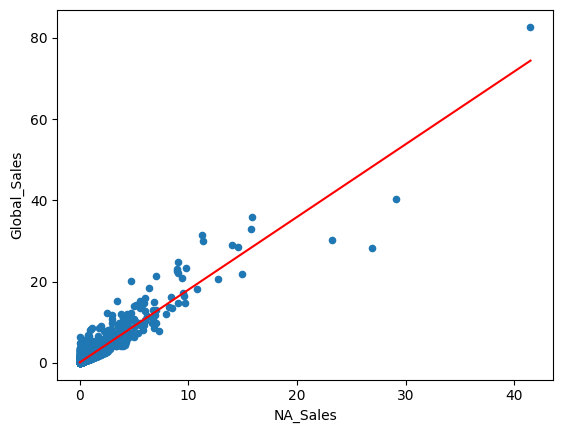

In [ ]:
df_lr.plot('NA_Sales', 'Global_Sales', kind='scatter')
plt.plot(df_lr['NA_Sales'], M1.fittedvalues, color='red')
plt.show()

df_lr = df_lr.drop(df_lr[df_lr['NA_Sales'] > 40].index)

In [ ]:
M2 = sm.ols("Global_Sales ~ NA_Sales + EU_Sales + JP_Sales", df_lr).fit()
print(M2.summary())

                            OLS Regression Results                            
Dep. Variable:           Global_Sales   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                 8.174e+05
Date:                Sun, 26 Nov 2023   Prob (F-statistic):               0.00
Time:                        22:13:45   Log-Likelihood:                 10602.
No. Observations:               16540   AIC:                        -2.120e+04
Df Residuals:                   16536   BIC:                        -2.117e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0062      0.001      5.938      0.0

In [ ]:
#y=b0+b1x+b2x2+b3x3
M4 = sm.ols("Global_Sales ~ NA_Sales + EU_Sales + I(JP_Sales**2) + I(NA_Sales**3) + I(EU_Sales)", df_lr).fit()
print(M4.summary())

                            OLS Regression Results                            
Dep. Variable:           Global_Sales   R-squared:                       0.980
Model:                            OLS   Adj. R-squared:                  0.980
Method:                 Least Squares   F-statistic:                 2.022e+05
Date:                Sun, 26 Nov 2023   Prob (F-statistic):               0.00
Time:                        22:05:25   Log-Likelihood:                 1542.1
No. Observations:               16540   AIC:                            -3074.
Df Residuals:                   16535   BIC:                            -3036.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.0463      0.002  